<a href="https://colab.research.google.com/github/newbie0309/DSCover-2022-2-Main-Project/blob/main/bike_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
plt.rc('font', family = 'NanumBarunGothic')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/bike_merged.csv")

In [ ]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
data

,wind_speed,humidity,ground_temp,temp,year,month,day,rental_num
0,1.104167,61.708333,-0.995833,-2.708333,2020,1,1,16236.0
1,1.912500,64.875000,-0.020833,0.987500,2020,1,2,28890.0
2,1.879167,57.833333,-0.554167,0.120833,2020,1,3,30809.0
3,1.895833,50.875000,-0.395833,1.054167,2020,1,4,25709.0
4,1.045833,45.666667,-0.737500,1.175000,2020,1,5,23206.0
...,...,...,...,...,...,...,...,...
695,1.633333,57.916667,-4.262500,-8.025000,2021,12,27,42521.0
696,2.258333,74.208333,-2.929167,-4.350000,2021,12,28,51268.0
697,2.687500,73.541667,-0.783333,0.408333,2021,12,29,52017.0
698,3.225000,49.625000,-2.408333,-3.570833,2021,12,30,48993.0


# EDA

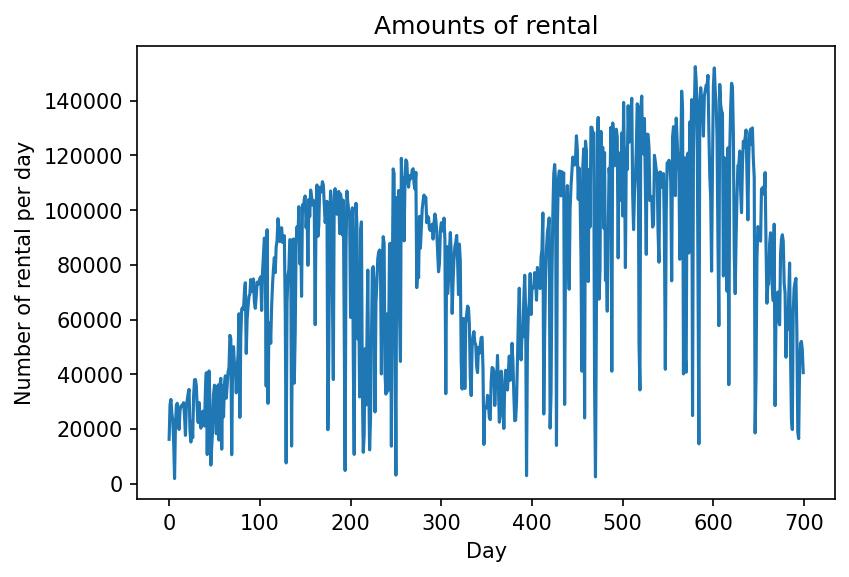

In [ ]:
#따릉이 대여량 시각화
plt.figure(dpi = 150)
x = data['rental_num'].index
y = data['rental_num'].values

plt.title('Amounts of rental')
plt.xlabel('Day')
plt.ylabel('Number of rental per day')
plt.plot(x, y)
plt.show()

# Modeling

In [ ]:
train, test = train_test_split(data, test_size = 0.3, shuffle = True, random_state = 123)

In [ ]:
train_x = train.drop(['rental_num'], axis = 1)
train_y = train[['rental_num']]

test_x = test.drop(['rental_num'], axis = 1)
test_y = test[['rental_num']]

In [ ]:
data2 = data.drop(['rental_num'], axis = 1)
data3 = data[['rental_num']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y) # 학습

LinearRegression()

In [ ]:
y_hat = model.predict(data2) # y 예측

In [ ]:
nmae = np.mean(abs(y_hat - data3) / data3) # nmae 계산

print(f'모델 NMAE: {nmae}')

모델 NMAE: rental_num    0.403927
dtype: float64


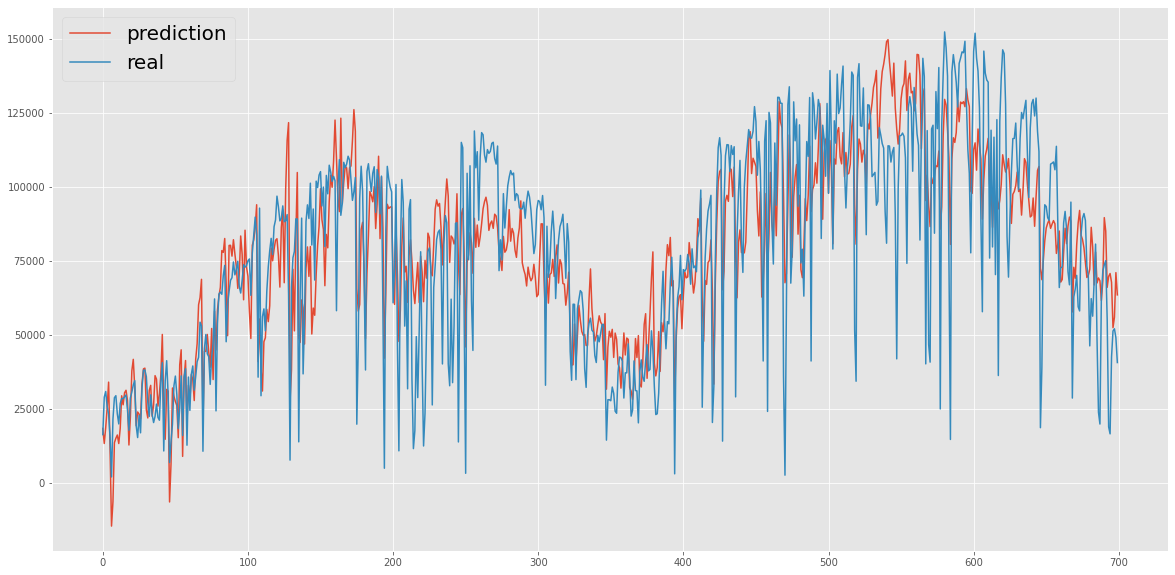

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [ ]:
#결과
pd.DataFrame(np.round(y_hat))

,0
0,18325.0
1,13235.0
2,18577.0
3,25285.0
4,33980.0
...,...
695,67728.0
696,52415.0
697,55953.0
698,71012.0
